In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [273]:
train = pd.read_csv('C:/Users/rym2007/Desktop/Data Science Projects/Housing/train.csv')
test = pd.read_csv('C:/Users/rym2007/Desktop/Data Science Projects/Housing/train.csv')

In [274]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [275]:
train_n = train.select_dtypes(include=np.number)

In [276]:
train['SaleCondition'] = train['SaleCondition']

C:\Users\rym2007\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


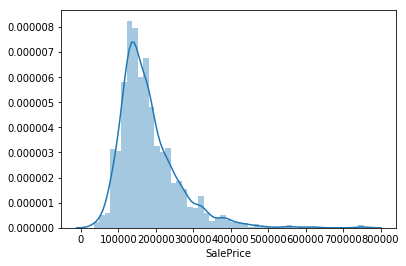

In [277]:
sns.distplot(train['SalePrice'])

C:\Users\rym2007\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


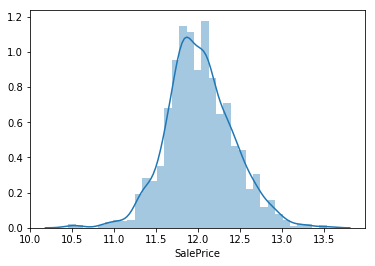

In [278]:
sns.distplot(train['SalePrice'].apply(np.log))

In [279]:
###train['SalePrice']=train['SalePrice'].apply(np.exp)

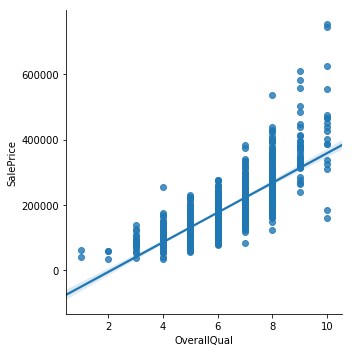

In [280]:
sns.lmplot(x='OverallQual', y='SalePrice',data=train)

In [281]:
corr = train_n.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:], '\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



In [282]:
oq_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
oq_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


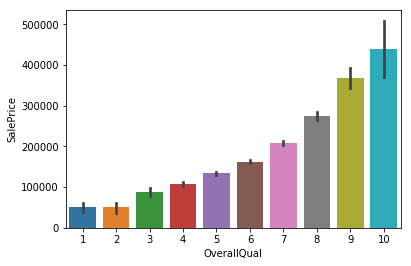

In [283]:
sns.barplot(x='OverallQual', y='SalePrice', data=train)

In [284]:
null = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
null.columns = ['Null Count']
null.index.name = 'Feature'
null

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


In [285]:
train_c = train.select_dtypes(exclude=[np.number])

In [286]:
train_c.count()

MSZoning         1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinType2     1422
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
KitchenQual      1460
Functional       1460
FireplaceQu       770
GarageType       1379
GarageFinish     1379
GarageQual       1379
GarageCond       1379
PavedDrive       1460
PoolQC              7
Fence             281
MiscFeature        54
SaleType         1460
SaleCondition    1460
dtype: int64

In [287]:
train_c['SaleCondition'].value_counts().count()

6

In [288]:
print(train['Condition1'].values, "\n")

['Norm' 'Feedr' 'Norm' ... 'Norm' 'Norm' 'Norm'] 



In [289]:
#train['SalePrice']=train['SalePrice'].apply(np.exp)

In [290]:
cond1 = pd.get_dummies(train['Condition1'],drop_first=True)
cond2 = pd.get_dummies(train['Condition2'],drop_first=True)
neigh = pd.get_dummies(train['Neighborhood'],drop_first=True)


cond1 = pd.get_dummies(test['Condition1'],drop_first=True)
cond2 = pd.get_dummies(test['Condition2'],drop_first=True)
neigh = pd.get_dummies(test['Neighborhood'],drop_first=True)


In [291]:
sc = pd.get_dummies(train['SaleCondition'],drop_first=True)
sc = pd.get_dummies(test['SaleCondition'],drop_first=True)

In [292]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [293]:
train.drop(['Condition1', 'Condition2', 'Neighborhood','SaleCondition'],axis=1, inplace=True)
test.drop(['Condition1', 'Condition2', 'Neighborhood','SaleCondition'],axis=1, inplace=True)

In [294]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,250000


In [295]:
train =pd.concat([train,cond1,cond2,neigh,sc],axis=1)
test =pd.concat([test,cond1,cond2,neigh,sc],axis=1)


In [296]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SawyerW,Somerst,StoneBr,Timber,Veenker,AdjLand,Alloca,Family,Normal,Partial
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,1,0


In [297]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [298]:
train['SalePrice']=train['SalePrice'].apply(np.log)
test['SalePrice']=test['SalePrice'].apply(np.log)

In [299]:
train_c= train.select_dtypes(exclude=[np.number])
test_c= test.select_dtypes(exclude=[np.number])

In [300]:
trcd = pd.get_dummies(train_c)
tecd = pd.get_dummies(test_c)

In [301]:
train_f = train.select_dtypes(include = np.number)
test_f = test.select_dtypes(include = np.number)

In [302]:
train_f = train_f.select_dtypes(include=[np.number]).interpolate().dropna()
test_f = test_f.select_dtypes(include=[np.number]).interpolate().dropna()

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
X_train, X_test, y_train, y_test = train_test_split(train_f.drop(['SalePrice','Id'],axis=1), 
                                                    train_f['SalePrice'], test_size=0.30, 
                                                    random_state=101)

In [307]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [309]:
predictions = model.predict(X_test)

Text(0,0.5,'Predicted Y')

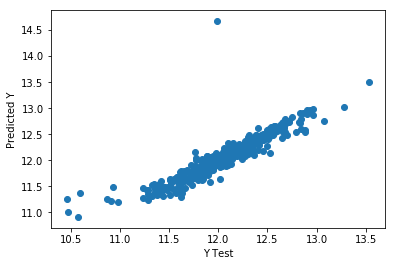

In [310]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [311]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0916038937362773
MSE: 0.032284064345000474
RMSE: 0.17967766790839776
